In [1]:
import pandas as pd
import numpy as np
import keras
import keras.regularizers as regularizers
import keras.optimizers as optimizers
import keras.models as models
import keras.layers as layers

In [90]:
raw=pd.read_csv("NIFTY501.csv")
raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-10-24,5477.600098,5577.899902,5419.399902,5496.149902,5496.149902,0.0
1,2007-10-25,5499.049805,5605.950195,5469.299805,5568.950195,5568.950195,0.0
2,2007-10-26,5564.250000,5716.899902,5513.350098,5702.299805,5702.299805,0.0
3,2007-10-29,5708.899902,5922.500000,5708.899902,5905.899902,5905.899902,0.0
4,2007-10-30,5917.549805,5976.000000,5833.899902,5868.750000,5868.750000,0.0
...,...,...,...,...,...,...,...
3339,2021-05-07,14816.849609,14863.049805,14765.500000,14823.150391,14823.150391,488000.0
3340,2021-05-10,14928.250000,14966.900391,14892.500000,14942.349609,14942.349609,522000.0
3341,2021-05-11,14789.700195,14900.000000,14771.400391,14850.750000,14850.750000,647400.0
3342,2021-05-12,14823.549805,14824.049805,14649.700195,14696.500000,14696.500000,643800.0


In [91]:
raw=(raw).dropna()
raw=raw.reset_index(drop=True)

In [92]:
"""To predict prices we are not going to just create a final output neuron with requiered value(High or Low)
but to obtain more accurate results we take the ratio of high/open or open/low subtract 1 and multiply by 1000000.
And this will be the output of our neural model. With this ratio and day's open we can calculate day's high and low value."""

"To predict prices we are not going to just create a final output neuron with requiered value(High or Low)\nbut to obtain more accurate results we take the ratio of high/open or open/low subtract 1 and multiply by 1000000.\nAnd this will be the output of our neural model. With this ratio and day's open we can calculate day's high and low value."

In [93]:
Data=pd.DataFrame()
Data['High']=(raw['High']/raw['Open']-1)*100000000

In [94]:
Data['open1']=0.0
Data['open2']=0.0
Data['open3']=0.0
Data['open4']=0.0
Data['open5']=0.0
Data['open6']=0.0
Data['open7']=0.0

In [95]:
for i in range(len(raw['Open'])):
    if i>7:
        for k in range(1,8,1):
            Data[str('open'+str(k))][i]=raw['Open'][(i-k)]

In [96]:
Data=Data[Data['open1']!=0.0]

In [97]:
Data=Data.reset_index(drop=True)

In [98]:
Data

,High,open1,open2,open3,open4,open5,open6,open7
0,2.806842e+05,5854.850098,5903.799805,5868.899902,5917.549805,5708.899902,5564.250000,5499.049805
1,1.882986e+06,5931.899902,5854.850098,5903.799805,5868.899902,5917.549805,5708.899902,5564.250000
2,1.365353e+06,5847.100098,5931.899902,5854.850098,5903.799805,5868.899902,5917.549805,5708.899902
3,2.595470e+04,5782.399902,5847.100098,5931.899902,5854.850098,5903.799805,5868.899902,5917.549805
4,0.000000e+00,5779.299805,5782.399902,5847.100098,5931.899902,5854.850098,5903.799805,5868.899902
...,...,...,...,...,...,...,...,...
3296,3.118085e+05,14668.349609,14604.150391,14687.250000,14481.049805,14747.349609,14979.000000,14710.500000
3297,2.589077e+05,14816.849609,14668.349609,14604.150391,14687.250000,14481.049805,14747.349609,14979.000000
3298,7.457880e+05,14928.250000,14816.849609,14668.349609,14604.150391,14687.250000,14481.049805,14747.349609
3299,3.373011e+03,14789.700195,14928.250000,14816.849609,14668.349609,14604.150391,14687.250000,14481.049805


In [99]:
nn=models.Sequential()

In [100]:
nn.add(layers.Dense(802,activation='relu',kernel_regularizer=regularizers.l1(1000),input_shape=(7,)))
nn.add(layers.Dense(3000,activation='relu',kernel_regularizer=regularizers.l2(1000)))
#nn.add(layers.Dense(5000,activation='relu',kernel_regularizer=regularizers.l1(1000),input_shape=(7,)))
nn.add(layers.Dense(1000,activation='relu',kernel_regularizer=regularizers.l2(1000)))
nn.add(layers.Dense(300,activation='relu',kernel_regularizer=regularizers.l1(1000)))
nn.add(layers.Dense(50,activation='relu',kernel_regularizer=regularizers.l2(1000)))
nn.add(layers.Dense(1,activation='relu',kernel_regularizer=regularizers.l2(1000)))

In [104]:
def los(a,b):
    return abs(a-b)-1


In [105]:
nn.compile(optimizer='rmsprop',loss="mean_absolute_error",metrics=['accuracy'])



In [106]:
Input=Data.iloc[:3000,1:]
Output=Data.iloc[:3000,0:1]
Input_t=Data.iloc[3000:,1:]
Output_t=Data.iloc[3000:,0:1]

In [107]:
nn.fit(Input,Output,batch_size=100,epochs=100)

Epoch 1/100
25/25 [==============================] - 3s 41ms/step - loss: 9671841.0192 - accuracy: 0.0346
Epoch 2/100
25/25 [==============================] - 1s 41ms/step - loss: 2762714.0769 - accuracy: 0.0365
Epoch 3/100
25/25 [==============================] - 1s 41ms/step - loss: 960314.5433 - accuracy: 0.0432
Epoch 4/100
25/25 [==============================] - 1s 41ms/step - loss: 920662.9952 - accuracy: 0.0407
Epoch 5/100
25/25 [==============================] - 1s 41ms/step - loss: 895110.0168 - accuracy: 0.0416
Epoch 6/100
25/25 [==============================] - 1s 41ms/step - loss: 889657.8197 - accuracy: 0.0336
Epoch 7/100
25/25 [==============================] - 1s 41ms/step - loss: 886481.3654 - accuracy: 0.0382
Epoch 8/100
25/25 [==============================] - 1s 41ms/step - loss: 901496.6562 - accuracy: 0.0393
Epoch 9/100
25/25 [==============================] - 1s 40ms/step - loss: 874652.4255 - accuracy: 0.0375
Epoch 10/100
25/25 [==============================] -

25/25 [==============================] - 1s 40ms/step - loss: 885508.4712 - accuracy: 0.0000e+00
Epoch 77/100
25/25 [==============================] - 1s 40ms/step - loss: 894604.9976 - accuracy: 0.0000e+00
Epoch 78/100
25/25 [==============================] - 1s 40ms/step - loss: 927751.0553 - accuracy: 0.0000e+00
Epoch 79/100
25/25 [==============================] - 1s 40ms/step - loss: 882504.4423 - accuracy: 0.0000e+00
Epoch 80/100
25/25 [==============================] - 1s 40ms/step - loss: 900478.3462 - accuracy: 0.0000e+00
Epoch 81/100
25/25 [==============================] - 1s 40ms/step - loss: 875612.0385 - accuracy: 0.0000e+00
Epoch 82/100
25/25 [==============================] - 1s 40ms/step - loss: 903355.0601 - accuracy: 0.0000e+00
Epoch 83/100
25/25 [==============================] - 1s 40ms/step - loss: 873663.3654 - accuracy: 0.0000e+00
Epoch 84/100
25/25 [==============================] - 1s 41ms/step - loss: 903479.2476 - accuracy: 0.0000e+00
Epoch 85/100
25/25 [===

In [108]:
"""Testing on test set."""
for i in range(200):
    print(raw['High'][(i+8+2500)]-((nn.predict(Input_t.iloc[i:(i+1),:])[0])/100000000+1)*raw['Open'][(i+2500+8)])

[98.44993386]
[298.99974647]
[6.79954379]
[119.29954597]
[63.69993849]
[37.29954598]
[4.79954432]
[80.1989585]
[16.69993506]
[0.4489597]
[38.34935311]
[0.09935225]
[43.19994102]
[90.99974369]
[66.40013078]
[16.44993459]
[46.5495467]
[45.54954692]
[0.4001332]
[20.84935239]
[10.39916201]
[54.09935742]
[25.40013706]
[132.05052832]
[89.09935315]
[27.29954806]
[14.54954876]
[1.14915924]
[9.19994444]
[104.10033847]
[45.34935926]
[40.34935862]
[58.90014451]
[154.34936301]
[19.90014011]
[14.74975021]
[68.44896801]
[68.49974914]
[5.24974698]
[103.34935812]
[27.69994079]
[63.99974552]
[11.94896157]
[-0.0002568]
[59.24974363]
[24.60032755]
[141.85032993]
[3.15013002]
[15.29954349]
[8.54954386]
[21.99973994]
[45.54954314]
[58.69993551]
[0.19895666]
[41.9001303]
[68.1491517]
[53.24973636]
[0.80051644]
[0.44895401]
[-0.00026351]
[72.49973766]
[0.64914908]
[72.90012767]
[5.89914854]
[70.09934547]
[19.69895167]
[116.60031973]
[38.49973523]
[1.65012564]
[3.1003232]
[4.99973856]
[40.14915498]
[12.449936

In [21]:
nn.predict(Input_t.iloc[8:(8+1),:])

array([[nan]], dtype=float32)

In [114]:
s=raw['High'].iloc[(0+8+2500):3000]-((nn.predict(Input_t.iloc[i:(i+1),:])[0])/100000000+1)*raw['Open'].iloc[(0+2500+8):3000]

In [129]:
raw["High"]-((nn.predict(Input_t.iloc[3:(3+1),:])[0])/100000000+1)*raw["Open"]

0       100.299669
1       106.900255
2       152.649765
3       213.599957
4        58.450049
           ...    
3304     46.199831
3305     38.650023
3306    110.299441
3307      0.499635
3308      0.249637
Length: 3309, dtype: float64

In [272]:
print((nn.predict(pd.DataFrame([[11487.20,11540.15,11447.80,11363.3,11218.6,11378.55,11359.60]]))/1000000+1))

[[1.01023939]]


In [128]:
len(s[s<-3])

0

In [249]:
#nn.save('HighValuePredictor')

In [260]:
Data2=pd.DataFrame()
Data2['Low']=(raw['Open']/raw['Low']-1)*1000000
for k in range(7):
    Data2['open'+str(k+1)]=0

In [261]:
for i in range(len(raw['Close'])):
    if i>7:
        for k in range(1,8,1):
            Data2[str('open'+str(k))][i]=raw['Open'][(i-k)]

C:\Users\sampu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [262]:
Data2=Data2[Data2['open1']!=0.0]

In [263]:
Data2=Data2.reset_index(drop=True)

In [264]:
Data2

,Low,open1,open2,open3,open4,open5,open6,open7
0,0.000000,4942,4937,4939,4837,4752,4734,4550
1,4028.892520,4996,4942,4937,4939,4837,4752,4734
2,6922.737439,5021,4996,4942,4937,4939,4837,4752
3,16699.037320,5069,5021,4996,4942,4937,4939,4837
4,8451.912479,5211,5069,5021,4996,4942,4937,4939
...,...,...,...,...,...,...,...,...
3160,7803.020117,11359,11354,11566,11478,11464,11777,11602
3161,2990.502303,11378,11359,11354,11566,11478,11464,11777
3162,3169.254442,11218,11378,11359,11354,11566,11478,11464
3163,2443.052307,11363,11218,11378,11359,11354,11566,11478


In [266]:
mm=models.Sequential()
mm.add(layers.Dense(500,activation='relu',kernel_regularizer=regularizers.l2(1000),input_shape=(7,)))
mm.add(layers.Dense(2000,activation='relu',kernel_regularizer=regularizers.l2(1000),input_shape=(7,)))
mm.add(layers.Dense(3000,activation='relu',kernel_regularizer=regularizers.l2(1000),input_shape=(7,)))
mm.add(layers.Dense(5000,activation='relu',kernel_regularizer=regularizers.l2(1000),input_shape=(7,)))
mm.add(layers.Dense(500,activation='relu',kernel_regularizer=regularizers.l2(1000),input_shape=(7,)))
mm.add(layers.Dense(1,activation='relu',kernel_regularizer=regularizers.l2(1000),input_shape=(7,)))
mm.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'])

In [268]:
mm.fit(Data2.iloc[:2500,1:],Data2.iloc[:2500,:1],epochs=25,batch_size=20)

Epoch 1/25
2500/2500 [==============================] - 17s 7ms/step - loss: 901928060.0800 - accuracy: 0.0560 0s - loss: 947830616.4237 - ac
Epoch 2/25
2500/2500 [==============================] - 12s 5ms/step - loss: 438670004.4800 - accuracy: 0.0556
Epoch 3/25
2500/2500 [==============================] - 13s 5ms/step - loss: 240490660.4800 - accuracy: 0.0560
Epoch 4/25
2500/2500 [==============================] - 12s 5ms/step - loss: 1089300451.2000 - accuracy: 0.0068
Epoch 5/25
2500/2500 [==============================] - 12s 5ms/step - loss: 200850294.6080 - accuracy: 0.0000e+00
Epoch 6/25
2500/2500 [==============================] - 12s 5ms/step - loss: 202709927.4880 - accuracy: 0.0000e+00
Epoch 7/25
2500/2500 [==============================] - 13s 5ms/step - loss: 202114330.8320 - accuracy: 0.0000e+00
Epoch 8/25
2500/2500 [==============================] - 12s 5ms/step - loss: 194647941.6800 - accuracy: 0.0000e+00
Epoch 9/25
2500/2500 [==============================] - 12s 5ms/

In [279]:
"""Testing on test set"""
for i in range(2500,3000,1):
    print(raw['Low'][i+8]-(1/(mm.predict(Data2.iloc[i:i+1,1:])[0]/1000000+1))*raw['Open'][i+8]-180)

[-59.7294416]
[-36.08421129]
[-1.38316925]
[-70.44842609]
[-50.64668744]
[-25.80012341]
[-10.77250099]
[1.23518996]
[-36.15177542]
[-53.58285708]
[-18.71675444]
[-78.20252666]
[3.61619954]
[-64.03117567]
[-26.58323561]
[-78.38800251]
[-23.01717996]
[11.79875695]
[13.4028783]
[-4.74365832]
[-66.83658505]
[16.73663844]
[-64.74926149]
[-18.62474797]
[-143.85976354]
[-181.65407248]
[-3.15654523]
[-10.92916763]
[-148.41205897]
[-29.92696378]
[-13.40324035]
[-27.20946164]
[-123.03505861]
[-23.29753375]
[-158.10489941]
[-182.68399747]
[-41.88442001]
[-74.68243408]
[-13.08138115]
[-10.40359631]
[-3.7633397]
[-73.83390377]
[-25.73871778]
[-31.08557983]
[-103.07897404]
[-203.52021531]
[-93.62173635]
[-72.41018129]
[-61.55842607]
[-8.88752611]
[-13.61502094]
[-58.83716908]
[-61.09664147]
[-167.95327784]
[-144.94609184]
[-10.01522473]
[-54.58703833]
[-68.39455077]
[-27.38707143]
[-41.47618572]
[-56.46691293]
[-56.50649678]
[-34.19870429]
[-24.79755959]
[-170.60499887]
[-9.35873315]
[-38.01981122]


In [273]:
print((mm.predict(pd.DataFrame([[11487.20,11540.15,11447.80,11363.3,11218.6,11378.55,11359.60]]))/1000000+1))

[[1.019233]]


In [277]:
mm.save("LowValuePredictor")

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
regressor=RandomForestRegressor(n_estimators=2000)

In [15]:
regressor.fit(Input,Output)

C:\Users\sampu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

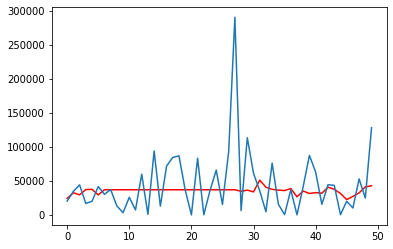

In [18]:
plt.plot(regressor.predict(Input_t)[:50],color='red')
plt.plot(Output_t.reset_index(drop=True).iloc[:50,:])

In [17]:
import matplotlib.pyplot as plt
list=[1]

In [80]:
for i in range(250):
    list.append(list((regressor.predict(Input_t.iloc[i:i+1,:])/10000000+1)*raw['Open'][i+8+2500]-raw['High'][i+8+2500]))

TypeError: append() takes exactly one argument (0 given)

In [58]:
Input

""
0
1
2
3
4
...
2495
2496
2497
2498


In [77]:
list=list.append([1])

TypeError: append() takes exactly one argument (0 given)

In [104]:
(((regressor.predict(Input_t)/10000000+1)*raw['Open'].iloc[2500:]-raw['High'].iloc[2500:]))

2500    -20.751148
2501      1.107455
2502   -146.557636
2503    -19.893959
2504     25.400072
           ...    
3168    -10.956065
3169    -32.477799
3170    -53.069859
3171      2.334506
3172     19.672202
Length: 673, dtype: float64

In [91]:
list.append([0,2][0])

TypeError: descriptor 'append' requires a 'list' object but received a 'int'

In [97]:
Input_t.shape

(673, 7)

In [100]:
raw['Open'].iloc[2500:]

2500    10229.299805
2501    10345.650391
2502    10263.099609
2503    10414.799805
2504    10494.400391
            ...     
3168    11378.549805
3169    11218.599609
3170    11363.299805
3171    11447.799805
3172    11540.150391
Name: Open, Length: 673, dtype: float64

In [99]:
Input_t

,open1,open2,open3,open4,open5,open6,open7
2500,10236.599609,10324.900391,10310.500000,10198.450195,10063.450195,10088.799805,10118.250000
2501,10229.299805,10236.599609,10324.900391,10310.500000,10198.450195,10063.450195,10088.799805
2502,10345.650391,10229.299805,10236.599609,10324.900391,10310.500000,10198.450195,10063.450195
2503,10263.099609,10345.650391,10229.299805,10236.599609,10324.900391,10310.500000,10198.450195
2504,10414.799805,10263.099609,10345.650391,10229.299805,10236.599609,10324.900391,10310.500000
...,...,...,...,...,...,...,...
3168,11359.599609,11354.400391,11566.200195,11478.549805,11464.299805,11777.549805,11602.950195
3169,11378.549805,11359.599609,11354.400391,11566.200195,11478.549805,11464.299805,11777.549805
3170,11218.599609,11378.549805,11359.599609,11354.400391,11566.200195,11478.549805,11464.299805
3171,11363.299805,11218.599609,11378.549805,11359.599609,11354.400391,11566.200195,11478.549805


In [79]:
input_cnn=np.array(Input).reshape(Input.shape[0],7,1)
input_cnn_t=np.array(Input_t).reshape(Input_t.shape[0],7,1)

In [80]:
cnn=models.Sequential()
cnn.add(layers.Conv1D(64,(3),activation='relu',input_shape=(7,1)))
cnn.add(layers.Conv1D(32,(3),activation='relu'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(1,activation='relu'))
cnn.compile(loss='mean_squared_error',optimizer='rmsprop')

In [81]:
cnn.fit(input_cnn,Output,epochs=20,batch_size=20)

Epoch 1/20
2500/2500 [==============================] - 16s 6ms/step - loss: 12377807054.8480
Epoch 2/20
2500/2500 [==============================] - 1s 277us/step - loss: 11631757274.1120
Epoch 3/20
2500/2500 [==============================] - 1s 276us/step - loss: 11634430091.2640
Epoch 4/20
2500/2500 [==============================] - 1s 272us/step - loss: 11631584183.2960
Epoch 5/20
2500/2500 [==============================] - 1s 261us/step - loss: 11612158967.8080
Epoch 6/20
2500/2500 [==============================] - 1s 270us/step - loss: 11640121881.6000
Epoch 7/20
2500/2500 [==============================] - 1s 296us/step - loss: 11626488949.7600
Epoch 8/20
2500/2500 [==============================] - 1s 276us/step - loss: 11633578586.1120
Epoch 9/20
2500/2500 [==============================] - 1s 272us/step - loss: 11628339186.6880
Epoch 10/20
2500/2500 [==============================] - 1s 272us/step - loss: 11612762664.9600
Epoch 11/20
2500/2500 [===========================

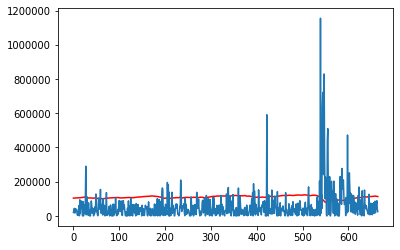

In [94]:
plt.plot(cnn.predict(input_cnn_t).reshape(Output_t.shape[0],),color='red')
plt.plot(np.array(Output_t).reshape(Output_t.size,))

In [84]:
import matplotlib.pyplot as plt

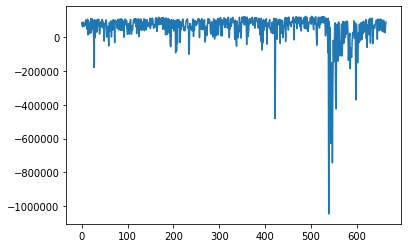

In [91]:
plt.plot(cnn.predict(input_cnn_t).reshape(Output_t.shape[0],)-np.array(Output_t).reshape(Output_t.size,))

In [105]:
rnn=models.Sequential()

In [106]:
rnn.add(layers.LSTM(64,return_sequences=True,input_shape=(7,1)))

In [107]:
rnn.add(layers.LSTM(500,return_sequences=True))
rnn.add(layers.LSTM(300,return_sequences=True))
rnn.add(layers.LSTM(320,return_sequences=True))
rnn.add(layers.LSTM(160,return_sequences=True))
rnn.add(layers.LSTM(50,return_sequences=False))
rnn.add(layers.Dense(1))
rnn.compile(loss='mean_absolute_error',optimizer='rmsprop')

In [109]:
rnn.fit(input_cnn,Output,epochs=20,batch_size=100)

Epoch 1/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76059.4278
Epoch 2/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76058.2495
Epoch 3/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76057.0736
Epoch 4/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76055.8981
Epoch 5/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76054.7225
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 76053.5452
Epoch 7/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76052.3680
Epoch 8/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76051.1942
Epoch 9/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76050.0209
Epoch 10/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76048.8416
Epoch 11/20
2500/2500 [==============================] - 6s 2ms/step - loss: 76047.6647
Epoch 12/20
2500/2500 [==================

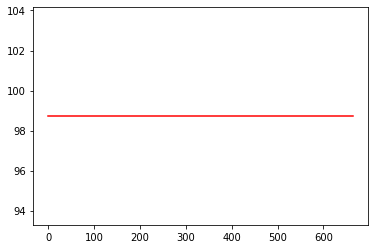

In [111]:
plt.plot(rnn.predict(input_cnn_t).reshape(Output_t.shape[0],),color='red')
#plt.plot(np.array(Output_t).reshape(Output_t.size,))

In [130]:
123456789123456789147852963**3


1881676377434183988670100450501939476509581586641896959007224508961940633220347

In [141]:
m_=0
n_=0
x=False
for i in range(9):
    for j in range(9):
        if ((5*i*i-5*i*j-3*j*j)**3+(3*i*i+5*j*i-5*j*j)**3+(4*i*i-4*i*j+6*j*j)**3)%9==8:
            m_=j
            n_=i
            x=True

In [142]:
x

True

In [143]:
m_

7

In [144]:
n_

8

In [145]:
(7*n_*n_+m_*n_+m_*m_)%9

4

In [147]:
(6*n_*n_-4*n_*m_+4*m_*m_)%9

5

In [153]:
y=0
for i in range(10**8):
    y=y+1

In [157]:
(10*10*10)**2/3600

277.77777777777777

In [159]:
z=np.array([[1],[2],[3]])

In [160]:
z

array([[1],
       [2],
       [3]])

In [161]:
z.T

array([[1, 2, 3]])

In [178]:
z*z.T
import tensorflow as tf

In [185]:
z=tf.Tensor(value_index=np.linspace(1,10**5,10**5),dtype=tf.int64)

TypeError: __init__() missing 1 required positional argument: 'op'

In [180]:
z.reshape(10**5,1)*z.reshape(1,10**5)

MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64

In [186]:
!pip install sympy


tensorforce 0.6.3 has requirement h5py~=2.10.0, but you'll have h5py 3.1.0 which is incompatible.
tensorforce 0.6.3 has requirement tensorflow==2.4.1, but you'll have tensorflow 2.5.0 which is incompatible.
  The script isympy.exe is installed in 'c:\users\sampu\appdata\local\programs\python\python37\Scripts' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You are using pip version 10.0.1, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [187]:
from sympy import Symbol
import sympy

In [188]:
x=Symbol('x')
y=Symbol('y')
z=Symbol('z')

In [194]:
def divisors(x):
    div=[]
    for i in range(1,x+1):
        if x%i==0:
            div.append(i)
    return div
def S(x,div):
    return (2*x/div)-div**2

In [193]:
divisors(2*15)

[1, 2, 3, 5, 6, 10, 15, 30]

In [195]:
S(114,6)

2.0